In [18]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy as sp
import pandas as pd
from pandas.io.json import json_normalize
import json
import datetime
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [192]:
def convert_datetime(name):
    json = pd.read_json('data/downloads/' + name + '_download.json')
    df_json = pd.DataFrame(json['downloads'])
    df = json_normalize(df_json['downloads'])
    df['day'] = pd.to_datetime(df['day'], infer_datetime_format=True)
    df.index = df['day']
    return df

def convert_week_datetime(name):
    df = convert_datetime(name)
    df_w = round(df.resample(rule="W").mean())
    return df_w

def convert_ts(name):
    df_w = convert_week_datetime(name)
    ts = sm.tsa.seasonal_decompose(df_w['downloads'].values, freq=52)
    return ts

def fit_SARIMAX(name):
    df_w = convert_week_datetime(name)
    y = df_w['downloads']
    y130 = y[:130]
    # パラメーターはおそらく正しくない
    p, d, q, sp, sd, sq = 2, 1, 2, 1, 1, 1
    # 52 で 1 年なので本当は 52 にしたい
    seasonal = 26
    result = SARIMAX(
        y130, order=(p,d,q), 
        seasonal_order=(sp,sd,sq,seasonal), 
        enforce_stationarity = False, 
        enforce_invertibility = False
    ).fit()
    return result



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


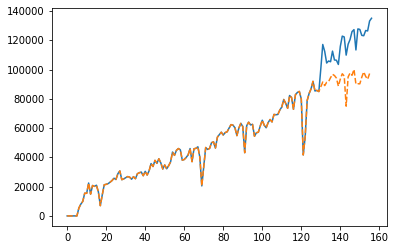

In [147]:
df_w = convert_week_datetime('yarn')
result = fit_SARIMAX('yarn')
pred = np.hstack([df_w['downloads'][:130].values, result.forecast(26)])
ax = plt.plot(df_w['downloads'].values, label="observation")
plt.plot(pred, '--', label="forecast")
# ax.fill_between(np.arange(1, 156]),
#                 pred.iloc[:, 0],
#                 pred.iloc[:, 1], color='k', alpha=.2)

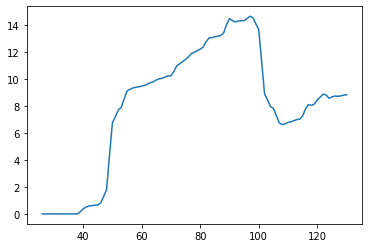

In [190]:
ts = convert_ts('m2m')
plt.plot(ts.trend)

In [165]:
df_w.describe()

,downloads
count,157.000000
mean,56982.031847
std,35020.571389
min,3.000000
25%,29540.000000
50%,50621.000000
75%,79591.000000
max,135158.000000


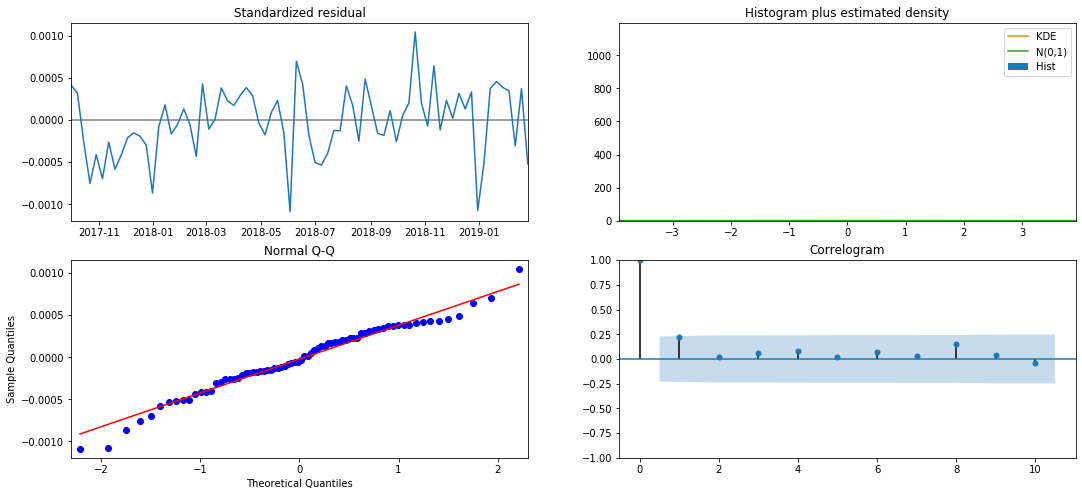

In [136]:
result.plot_diagnostics(figsize=(18, 8))
plt.show()

In [145]:
result2 = fit_SARIMAX('yarn')
# pred = result.get_prediction(start=130, dynamic=False)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


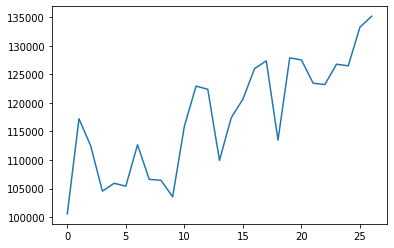

In [150]:
pred2 = result.forecast(26)
plt.plot(df_w['downloads'][130:].values)

In [169]:
# MSE
mse = ((pred2 - df_w['downloads'][131:].values) ** 2).mean()
print('mse', mse)
mean = df_w['downloads'].mean()
print('mean', mean)
r = mse / mean ** 2
rmse = round(np.sqrt(mse))
print('z-rmse', rmse / df_w.std())

mean 725624331.4416791
mean 56982.03184713376
rmse downloads    0.769176
dtype: float64


In [170]:
serverless = 'serverless'
df_w = convert_week_datetime(serverless)
result = fit_SARIMAX(serverless)
mse = ((result.forecast(26) - df_w['downloads'][131:].values) ** 2).mean()
rmse = round(np.sqrt(mse))
print('z-rmse', rmse / df_w.std())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
z-rmse downloads    1.042194
dtype: float64


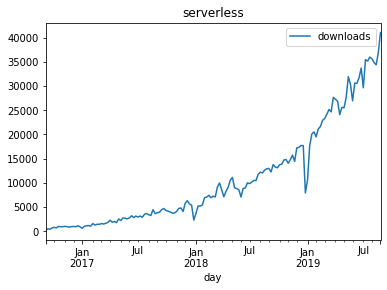

In [172]:
convert_week_datetime(serverless).plot(title=serverless)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
z-rmse downloads    0.42697
dtype: float64


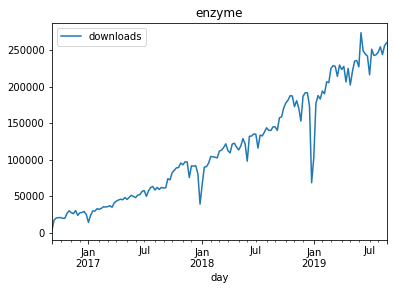

In [182]:
name = 'enzyme'
df_w = convert_week_datetime(name)
result = fit_SARIMAX(name)
mse = ((result.forecast(26) - df_w['downloads'][131:].values) ** 2).mean()
rmse = round(np.sqrt(mse))
print('z-rmse', rmse / df_w.std())
convert_week_datetime(name).plot(title=name)
